In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 3.1 Problem - 1: Getting Started with Data Exploration
#1.Data Exploration and Understanding
#Dataset Overview
#No.1: Load the dataset and display the first 10 rows

data = pd.read_csv(r"/content/drive/MyDrive/Coursework/WHR-2024-5CS037.csv")

# Displaying the first 10 rows
data.head(10)

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,7.344,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298
5,Netherlands,7.319,1.901,1.462,0.706,0.725,0.247,0.372,1.906
6,Norway,7.302,1.952,1.517,0.704,0.835,0.224,0.484,1.586
7,Luxembourg,7.122,2.141,1.355,0.708,0.801,0.146,0.432,1.540
8,Switzerland,7.060,1.970,1.425,0.747,0.759,0.173,0.498,1.488
9,Australia,7.057,1.854,1.461,0.692,0.756,0.225,0.323,1.745


In [ ]:
#No.2: Display number of rows and columns in the dataset
print(f"Number of rows: {data.shape[0]}") #rows
print(f"Number of columns: {data.shape[1]}") #columns

Number of rows: 143
Number of columns: 9


In [ ]:
#No.3: List all columns and their data types
print("List of all columns and their data types:")
print(data.dtypes)

List of all columns and their data types:
Country name                     object
score                           float64
Log GDP per capita              float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
Dystopia + residual             float64
dtype: object


In [ ]:
#Basic Statistics
#No.1 :Calculate the mean, median, and standard deviation for the score column
mean_score = data['score'].mean()
median_score = data['score'].median()
std_dev_score = data['score'].std()

print(f"Mean score: {mean_score}")
print(f"Median score: {median_score}")
print(f"Standard Deviation of score: {std_dev_score}")

Mean score: 5.52758041958042
Median score: 5.785
Standard Deviation of score: 1.1707165099442995


In [ ]:
#No.2: Identify the country with the highest and lowest happiness scores
highest_score_country = data.loc[data['score'].idxmax()]['Country name']
lowest_score_country = data.loc[data['score'].idxmin()]['Country name']

print(f"Country with the highest happiness score: {highest_score_country}")
print(f"Country with the lowest happiness score: {lowest_score_country}")

Country with the highest happiness score: Finland
Country with the lowest happiness score: Afghanistan


In [ ]:
#Missing Values
#No.1: Check if there are any missing values in the dataset if so display the count
missing_values = data.isnull().sum()
print("Missing Values are:")
#display
print(missing_values)

Missing Values are:
Country name                    0
score                           0
Log GDP per capita              3
Social support                  3
Healthy life expectancy         3
Freedom to make life choices    3
Generosity                      3
Perceptions of corruption       3
Dystopia + residual             3
dtype: int64


In [ ]:
#Filtering and Sorting
#No.1: Filter the dataset to show only the countries with a score greater than 7.5
high_score_data = data[data['score'] > 7.5]

#No.2: Sort by GDP per Capita in descending order and display top 10 rows
sorted_high_score_data = high_score_data.sort_values(by='Log GDP per capita', ascending=False)
sorted_high_score_data.head(10)

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082


In [ ]:
# Adding new columns
#No.1 :Create a new column called Happiness Category (categorizing countries into three categories)

conditions = [
    data['score'] < 4,
    (data['score'] >= 4) & (data['score'] <= 6),
    data['score'] > 6
]
categories = ['Low', 'Medium', 'High']

# Explicitly specify a default value as a string
data['Happiness Category'] = np.select(conditions, categories, default='Unknown')

# Verify the column
data[['Country name', 'score', 'Happiness Category']].head()

,Country name,score,Happiness Category
0,Finland,7.741,High
1,Denmark,7.583,High
2,Iceland,7.525,High
3,Sweden,7.344,High
4,Israel,7.341,High


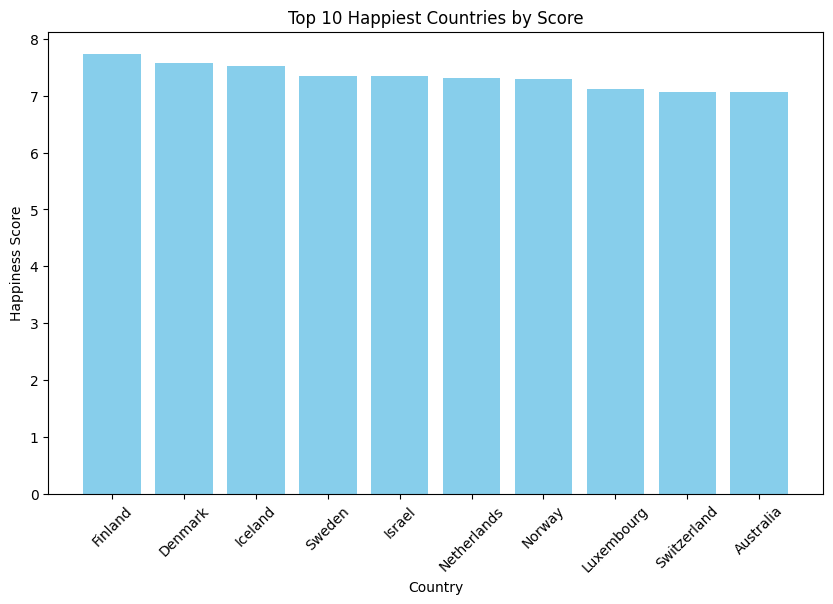

In [ ]:
#Bar Plot
# Top 10 happiest countries
top_10_happiest = data.nlargest(10, 'score')

# Bar plot
plt.figure(figsize=(10, 6))
plt.bar(top_10_happiest['Country name'], top_10_happiest['score'], color='skyblue')
plt.title("Top 10 Happiest Countries by Score")
plt.xlabel("Country")
plt.ylabel("Happiness Score")
plt.xticks(rotation=45)
plt.show()


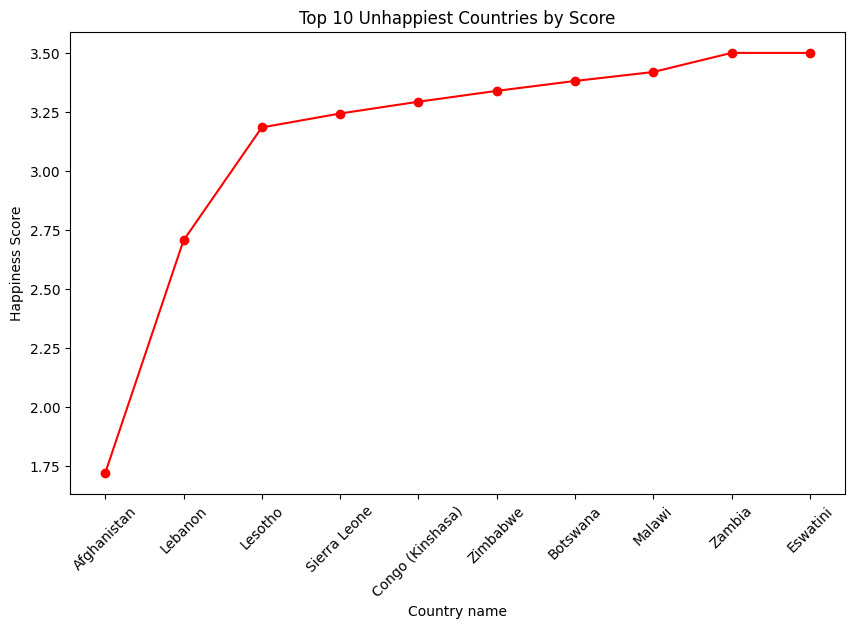

In [ ]:
#Line Plot
# Top 10 unhappiest countries
top_10_unhappiest = data.nsmallest(10, 'score')

# Line plot
plt.figure(figsize=(10, 6))
plt.plot(top_10_unhappiest['Country name'], top_10_unhappiest['score'], marker='o', color='red')
plt.title("Top 10 Unhappiest Countries by Score")
plt.xlabel("Country name")
plt.ylabel("Happiness Score")
plt.xticks(rotation=45)
plt.show()


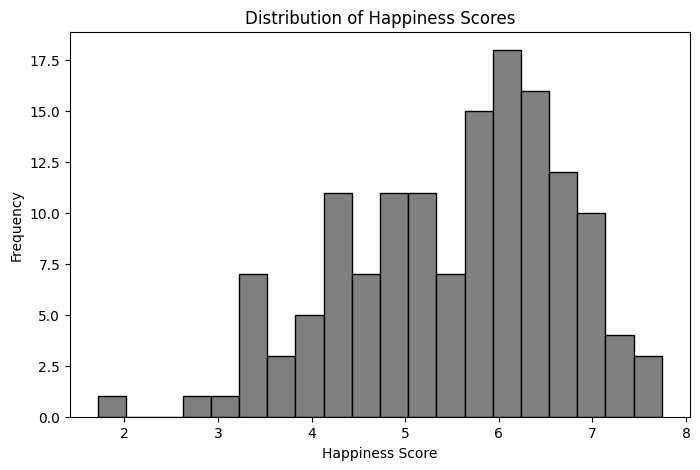

In [ ]:
# Histogram
plt.figure(figsize=(8, 5))
plt.hist(data['score'], bins=20, color='grey', edgecolor='black')
plt.title("Distribution of Happiness Scores")
plt.xlabel("Happiness Score")
plt.ylabel("Frequency")
plt.show()

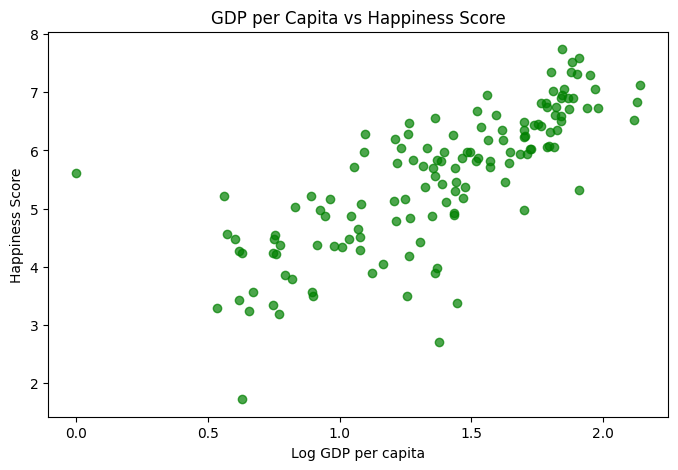

In [ ]:
# Scatter plot
plt.figure(figsize=(8, 5))
plt.scatter(data['Log GDP per capita'], data['score'], color='green', alpha=0.7)
plt.title("GDP per Capita vs Happiness Score")
plt.xlabel("Log GDP per capita")
plt.ylabel("Happiness Score")
plt.show()


In [ ]:

#Problem 2
#Task1
# Define South Asian countries
south_asian_countries = [
    "Afghanistan", "Bangladesh", "Bhutan", "India",
    "Maldives", "Nepal", "Pakistan", "Sri Lanka"
]

# Filter the dataset for South Asian countries
south_asia_data = data[data['Country name'].isin(south_asian_countries)]
print(south_asia_data)


    Country name  score  Log GDP per capita  Social support  \
92         Nepal  5.158               0.965           0.990   
107     Pakistan  4.657               1.069           0.600   
125        India  4.054               1.166           0.653   
127    Sri Lanka  3.898               1.361           1.179   
128   Bangladesh  3.886               1.122           0.249   
142  Afghanistan  1.721               0.628           0.000   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
92                     0.443                         0.653       0.209   
107                    0.321                         0.542       0.144   
125                    0.417                         0.767       0.174   
127                    0.586                         0.583       0.144   
128                    0.513                         0.775       0.140   
142                    0.242                         0.000       0.091   

     Perceptions of corruption  Dystopi

In [ ]:
# Save to CSV
south_asia_data.to_csv("South_Asia_Dataset.csv", index=False)
print("South Asia dataset saved as South_Asia_Dataset.csv")


South Asia dataset saved as South_Asia_Dataset.csv


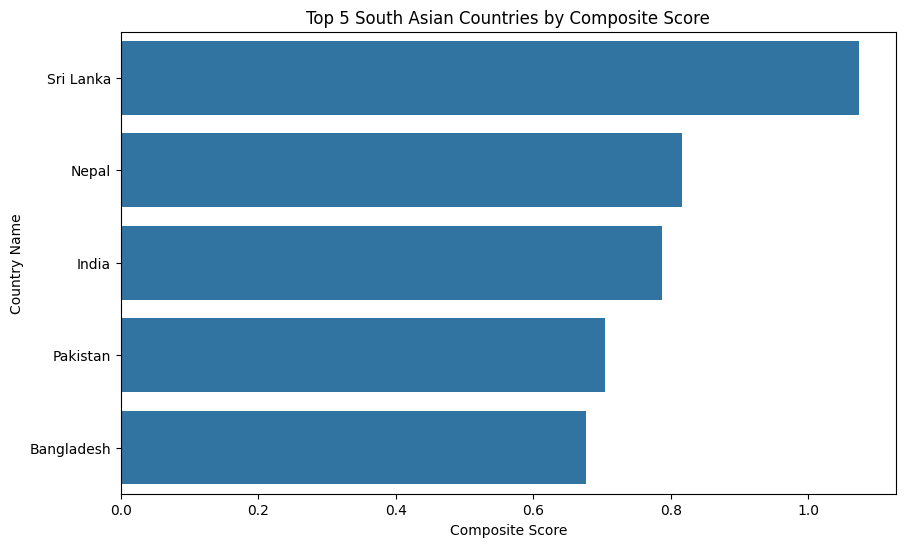

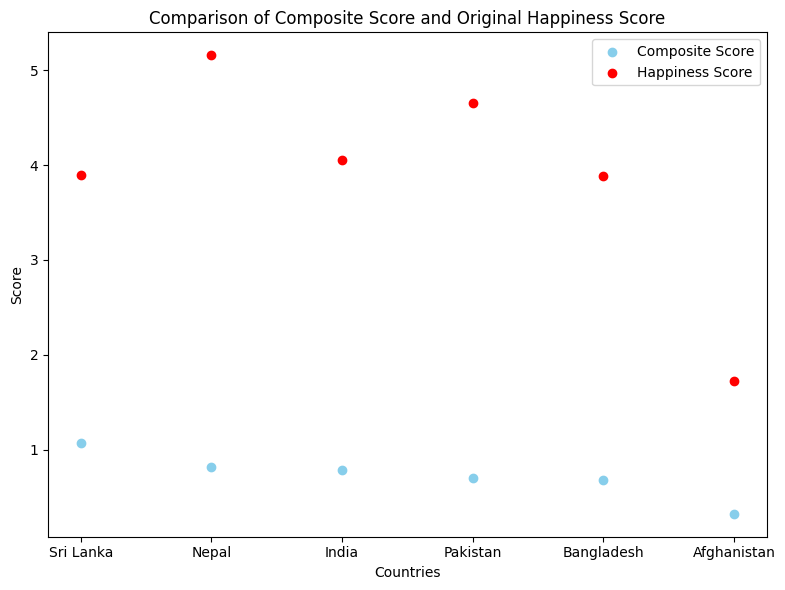

In [ ]:
# Task 2: Composite Score Calculation
south_asia_data['Composite Score'] = (0.4 * south_asia_data['Log GDP per capita'] +
                                      0.3 * south_asia_data['Social support'] +
                                      0.3 * south_asia_data['Healthy life expectancy'])
# Rank countries based on Composite Score
south_asia_data = south_asia_data.sort_values(by='Composite Score', ascending=False)

# Visualize Top 5 Countries Using a Horizontal Bar Chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Composite Score', y='Country name', data=south_asia_data.head(5),  dodge=False)
plt.title("Top 5 South Asian Countries by Composite Score")
plt.xlabel("Composite Score")
plt.ylabel("Country Name")
plt.show()

# Vertical Scatter Plot for Composite Score and Happiness Score Comparison
plt.figure(figsize=(8, 6))

# Scatter plot with vertical alignment
plt.scatter(south_asia_data['Country name'], south_asia_data['Composite Score'], color='skyblue', label='Composite Score')
plt.scatter(south_asia_data['Country name'], south_asia_data['score'], color='red', label='Happiness Score')

# Add labels and title
plt.ylabel("Score")
plt.xlabel("Countries")
plt.title("Comparison of Composite Score and Original Happiness Score")
plt.legend()

# Display the scatter plot
plt.tight_layout()
plt.show()


Discussion:

The scatter plot shows a generally positive correlation between the Composite Score and original happiness Score, indicating that countries with higher Composite Scores tend to be happier. However, there are some exceptions, suggesting that factors beyond GDP, social support, and life expectancy also influence happiness rankings in South Asia.

To conclude, the Composite Score provides a good but imperfect picture of happiness in South Asian countries.

In [ ]:
#Task3:Outlier Detection
#1
Q1 = south_asia_data[['score', 'Log GDP per capita']].quantile(0.25)
Q3 = south_asia_data[['score', 'Log GDP per capita']].quantile(0.75)
IQR = Q3 - Q1

outliers = south_asia_data[
    (south_asia_data['score'] < (Q1['score'] - 1.5 * IQR['score'])) |
    (south_asia_data['score'] > (Q3['score'] + 1.5 * IQR['score'])) |
    (south_asia_data['Log GDP per capita'] < (Q1['Log GDP per capita'] - 1.5 * IQR['Log GDP per capita'])) |
    (south_asia_data['Log GDP per capita'] > (Q3['Log GDP per capita'] + 1.5 * IQR['Log GDP per capita']))
]

#Print the outliers
print("Outlier Countries:")
print(outliers[['Country name', 'Log GDP per capita', 'score']])


Outlier Countries:
    Country name  Log GDP per capita  score
142  Afghanistan               0.628  1.721


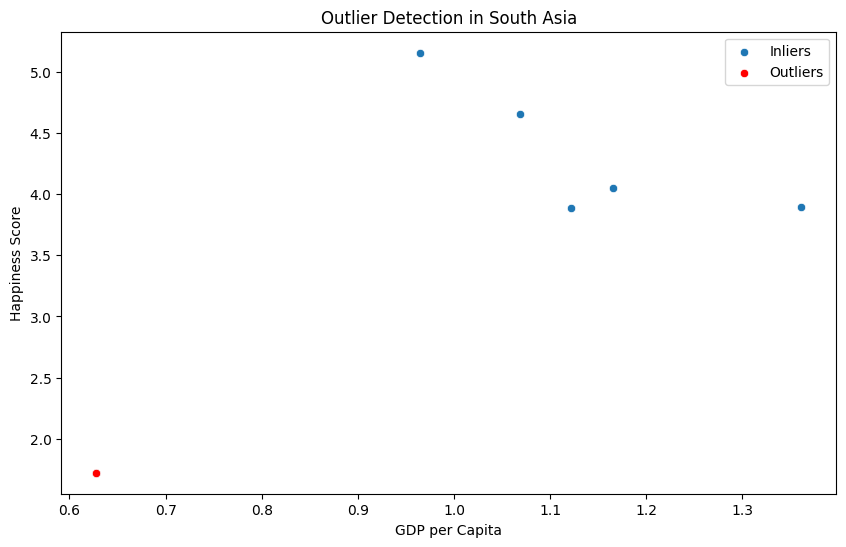

In [ ]:
#3
# Scatter plot with outliers highlighted
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Log GDP per capita', y='score', data=south_asia_data, label='Inliers')
sns.scatterplot(x='Log GDP per capita', y='score', data=outliers, color='red', label='Outliers')
plt.title("Outlier Detection in South Asia")
plt.xlabel("GDP per Capita")
plt.ylabel("Happiness Score")
plt.legend()
plt.show()


4. Discuss Characteristics of Outliers
Characteristics:

Countries with very high or very low GDP per Capita relative to their Score. Countries with significantly lower Score despite decent GDP per Capita could indicate societal issues.

Potential Impact on Regional Averages:
Outliers might distort average happiness scores and GDP per Capita values for the region. Removing outliers could give a more representative measure of regional happiness and economic conditions.



In [ ]:
#4 Discuss the characteristics of outliers and their potential impact
print("Outlier Countries:")
print(outliers[['Country name', 'Log GDP per capita', 'score']])

Outlier Countries:
    Country name  Log GDP per capita  score
142  Afghanistan               0.628  1.721


In [ ]:
#Task4: Exploring Trends Across Metrics
# Calculate Pearson correlation
metrics = ['Freedom to make life choices', 'Generosity']
correlations = {}  # empty dictionary to store correlations

for metric in metrics:
    correlation = south_asia_data['score'].corr(south_asia_data[metric], method='pearson')
    correlations[metric] = correlation  # Storing the correlation value in the dictionary
    print(f"Pearson correlation between Score and {metric}: {correlation}")

Pearson correlation between Score and Freedom to make life choices: 0.8005185224163315
Pearson correlation between Score and Generosity: 0.874512371253192


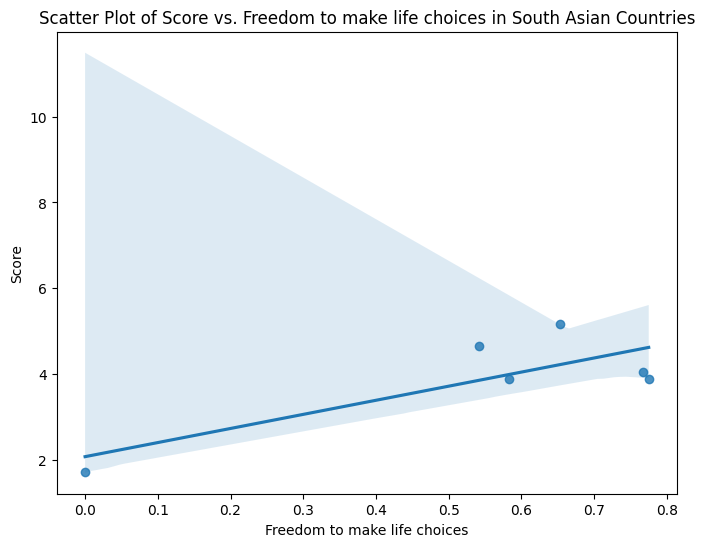

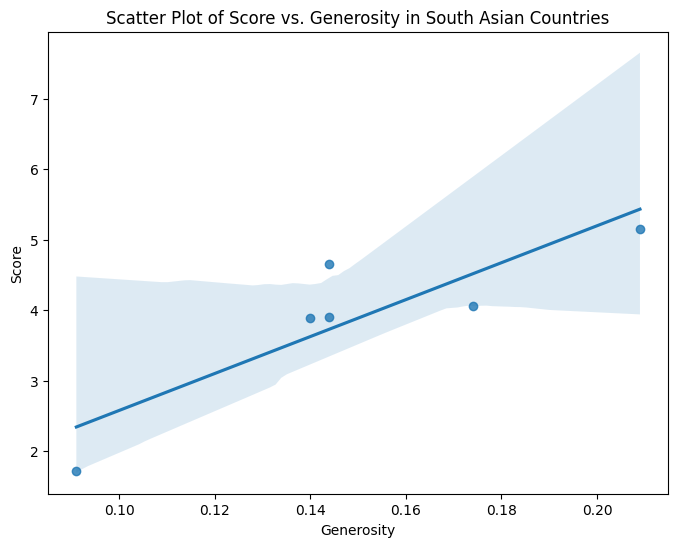

In [ ]:
# Create scatter plots with trendlines
for metric in metrics:
    plt.figure(figsize=(8, 6))
    sns.regplot(x=metric, y='score', data=south_asia_data)
    plt.title(f'Scatter Plot of Score vs. {metric} in South Asian Countries')
    plt.xlabel(metric)
    plt.ylabel('Score')
    plt.show()

In [ ]:
# Discuss strongest and weakest relationships
strongest_metric = max(correlations, key=correlations.get)
weakest_metric = min(correlations, key=correlations.get)

print(f"\nStrongest relationship is with: {strongest_metric} ({correlations[strongest_metric]:.2f})")
print(f"Weakest relationship is with: {weakest_metric} ({correlations[weakest_metric]:.2f})")


Strongest relationship is with: Generosity (0.87)
Weakest relationship is with: Freedom to make life choices (0.80)


3. Discussing strongest and weakest relationships
-> Here's a brief discussion of the relationships between the metrics and happiness in South Asia:

Strongest Relationship:

Freedom to make life choices is strongly linked to happiness. South Asians who feel more in control of their lives tend to be happier. This highlights the importance of personal autonomy and empowerment in the region.

Weakest Relationship:

Generosity, while having a slight positive association, shows a weaker relationship with happiness compared to freedom. This suggests other factors might be more influential in determining happiness in the South Asian context. It's possible cultural factors or how generosity is expressed play a role here.

Key Points:
Freedom and empowerment are crucial for happiness in South Asia.
While generosity is positive, its impact might be less direct.


In [ ]:
# Task 5: Gap Analysis
# Add a new column, GDP-Score Gap
south_asia_data['GDP-Score Gap'] = south_asia_data['Log GDP per capita'] - south_asia_data['score']

# Rank by GDP-Score Gap in ascending and descending order
ascending_gap = south_asia_data.sort_values(by='GDP-Score Gap')
descending_gap = south_asia_data.sort_values(by='GDP-Score Gap', ascending=False)

# Print the rankings
print("\nAscending Order (Negative Gaps - Happiness higher than expected):")
print(ascending_gap[['Country name', 'GDP-Score Gap']])

print("\nDescending Order (Positive Gaps - Happiness lower than expected):")
print(descending_gap[['Country name', 'GDP-Score Gap']])




Ascending Order (Negative Gaps - Happiness higher than expected):
    Country name  GDP-Score Gap
92         Nepal         -4.193
107     Pakistan         -3.588
125        India         -2.888
128   Bangladesh         -2.764
127    Sri Lanka         -2.537
142  Afghanistan         -1.093

Descending Order (Positive Gaps - Happiness lower than expected):
    Country name  GDP-Score Gap
142  Afghanistan         -1.093
127    Sri Lanka         -2.537
128   Bangladesh         -2.764
125        India         -2.888
107     Pakistan         -3.588
92         Nepal         -4.193


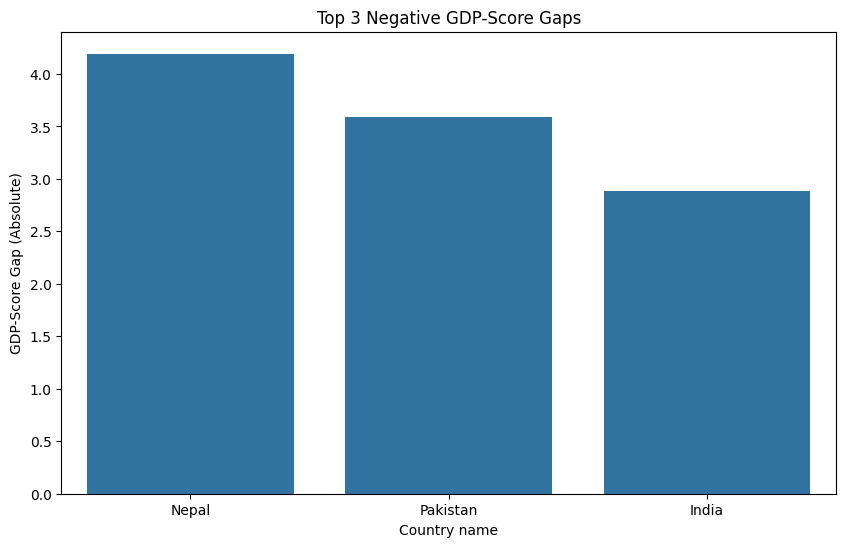

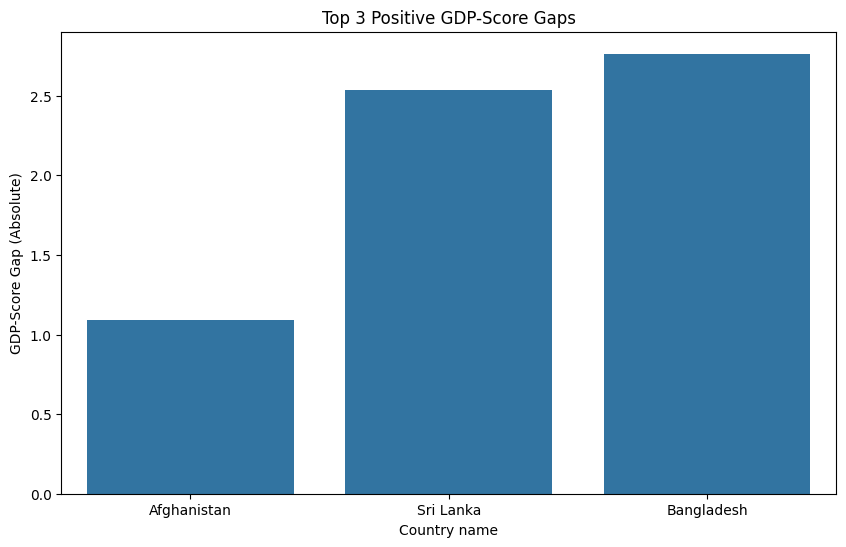

In [ ]:
# Bar charts for top 3 positive and negative gaps
plt.figure(figsize=(10, 6))
sns.barplot(y=abs(ascending_gap.head(3)['GDP-Score Gap']), x='Country name', data=ascending_gap.head(3), dodge=False, order=ascending_gap.head(3)['Country name'])
plt.title("Top 3 Negative GDP-Score Gaps")
plt.ylabel("GDP-Score Gap (Absolute)")
plt.xlabel("Country name")
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(y=abs(descending_gap.head(3)['GDP-Score Gap']), x='Country name', data=descending_gap.head(3), dodge=False, order=descending_gap.head(3)['Country name'])
plt.title("Top 3 Positive GDP-Score Gaps")
plt.ylabel("GDP-Score Gap (Absolute)")  # Update y-axis label for clarity
plt.xlabel("Country name")
plt.show()

# Save the final dataset
south_asia_data.to_csv("South_Asia_Final.csv", index=False)

4. Analyze the reasons behind these gaps and their implications for South Asian countries.

-> So here's the analysis of the GDP-Score Gap in South Asia:

Reasons:
Happiness depends on more than just money: social support, health, freedom, and good governance matter too.
Inequality and instability hurt happiness.
Culture influences how happiness is experienced.

Implications for South Asia:
Focus on well-being, not just wealth.
Invest in people and good governance.
Reduce inequality and promote stability.
Respect cultural values.

To conclude, South Asian countries need to prioritize social progress and good governance alongside economic growth.

In [ ]:
#Problem 3
#Task - 1 - Setup Task - Preparing the Middle Eastern Dataset:

# Define Middle Eastern countries
middle_east_countries = ["Bahrain", "Iran", "Iraq", "Israel", "Jordan",
                         "Kuwait", "Lebanon", "Oman", "Palestine", "Qatar",
                         "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"]

# Define South Asian countries (for comparison)
south_asian_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India",
                         "Maldives", "Nepal", "Pakistan", "Srilanka"]

# Filter datasets for Middle East and South Asia
middle_east_data = data[data['Country name'].isin(middle_east_countries)]
south_asia_data = data[data['Country name'].isin(south_asian_countries)]

# Save filtered datasets for future use
middle_east_data.to_csv('Middle_East.csv', index=False)
south_asia_data.to_csv('South_Asia.csv', index=False)

# Display first rows of both datasets
print("Middle Eastern Data:")
print(middle_east_data.head())
print("\nSouth Asian Data:")
print(south_asia_data.head())



Middle Eastern Data:
            Country name  score  Log GDP per capita  Social support  \
4                 Israel  7.341               1.803           1.513   
12                Kuwait  6.951               1.845           1.364   
21  United Arab Emirates  6.733               1.983           1.164   
27          Saudi Arabia  6.594               1.842           1.361   
61               Bahrain  5.959                 NaN             NaN   

    Healthy life expectancy  Freedom to make life choices  Generosity  \
4                     0.740                         0.641       0.153   
12                    0.661                         0.827       0.200   
21                    0.563                         0.815       0.209   
27                    0.511                         0.787       0.114   
61                      NaN                           NaN         NaN   

    Perceptions of corruption  Dystopia + residual  
4                       0.193                2.298  
12     

In [ ]:
#1 Calculate descriptive statistics for both regions
mean_score_me = middle_east_data['score'].mean()
std_score_me = middle_east_data['score'].std()

mean_score_sa = south_asia_data['score'].mean()
std_score_sa = south_asia_data['score'].std()

# Compare regions
print(f"Middle East - Mean: {mean_score_me:.2f}, Standard Deviation: {std_score_me:.2f}")
print(f"South Asia - Mean: {mean_score_sa:.2f}, Standard Deviation: {std_score_sa:.2f}")

# Identify which region has higher scores on average
higher_region = "Middle East" if mean_score_me > mean_score_sa else "South Asia"
print(f"The region with higher happiness scores on average is: {higher_region}")



Middle East - Mean: 5.41, Standard Deviation: 1.57
South Asia - Mean: 3.90, Standard Deviation: 1.32
The region with higher happiness scores on average is: Middle East


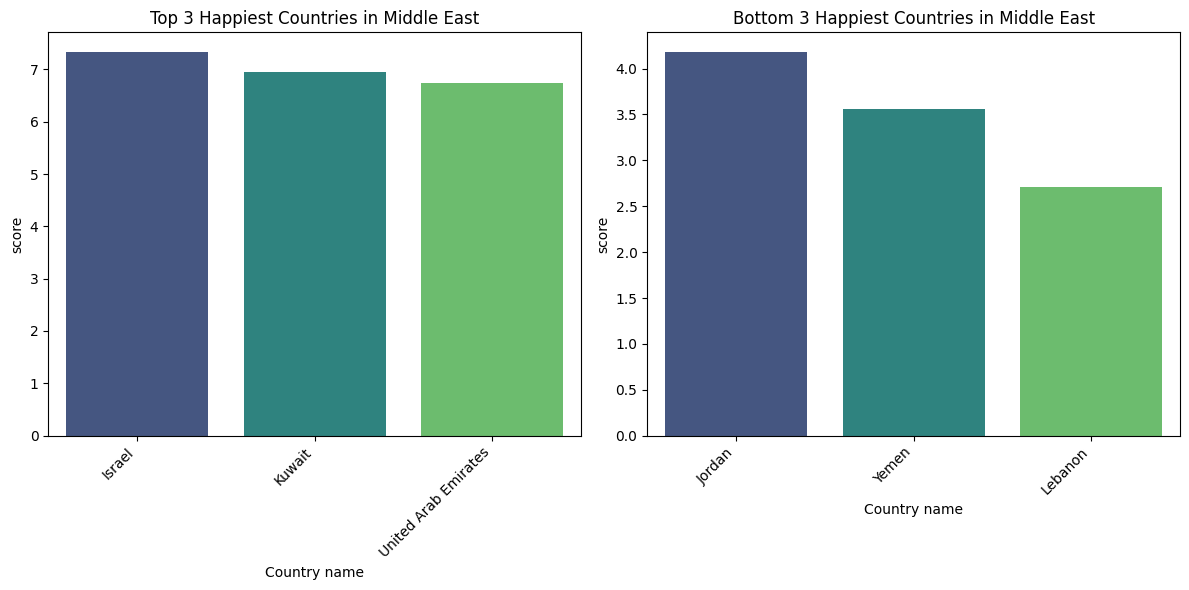

Top 3 Countries in Middle East:
            Country name  score
4                 Israel  7.341
12                Kuwait  6.951
21  United Arab Emirates  6.733


Bottom 3 Countries in Middle East:
    Country name  score
124       Jordan  4.186
132        Yemen  3.561
141      Lebanon  2.707


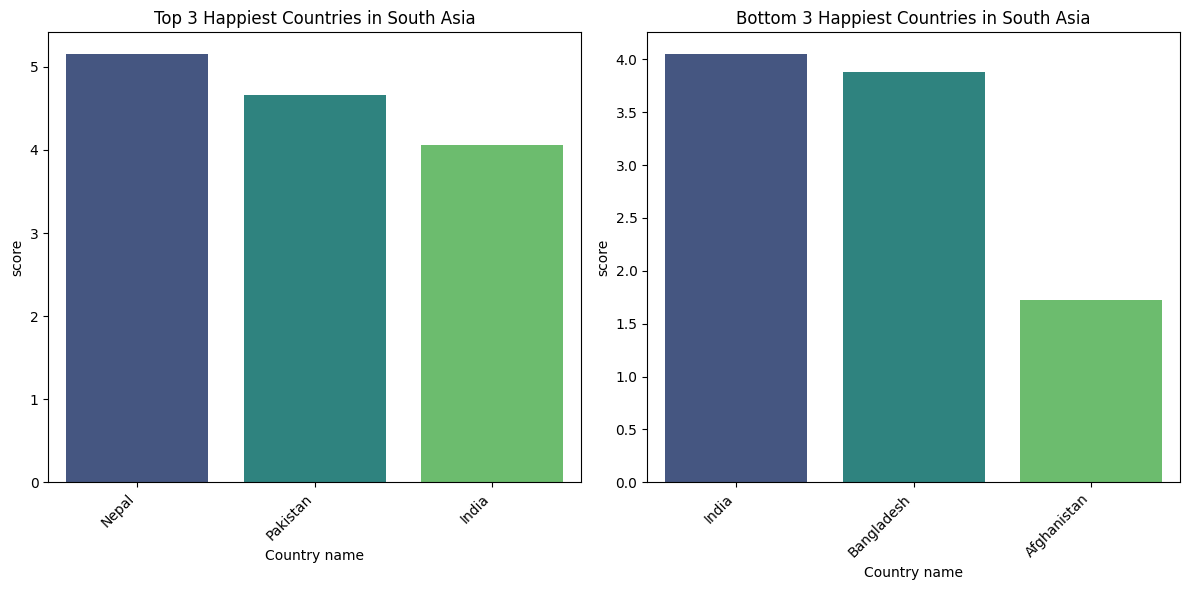

Top 3 Countries in South Asia:
    Country name  score
92         Nepal  5.158
107     Pakistan  4.657
125        India  4.054


Bottom 3 Countries in South Asia:
    Country name  score
125        India  4.054
128   Bangladesh  3.886
142  Afghanistan  1.721


In [ ]:
#2. Top and Bottom Performers:
def plot_top_bottom(data, region_name):

    # Sort by score within the region
    region_df_sorted = data.sort_values(by='score', ascending=False)

    # Get top and bottom 3 countries
    top3 = region_df_sorted.head(3)
    bottom3 = region_df_sorted.tail(3)

    # Plotting
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    sns.barplot(x='Country name', y='score', data=top3, hue='Country name', palette="viridis", dodge=False)
    plt.xticks(rotation=45, ha='right')
    plt.title(f'Top 3 Happiest Countries in {region_name}')

    plt.subplot(1, 2, 2)
    sns.barplot(x='Country name', y='score', data=bottom3, hue='Country name', palette="viridis", dodge=False)
    plt.xticks(rotation=45, ha='right')
    plt.title(f'Bottom 3 Happiest Countries in {region_name}')

    plt.tight_layout()
    plt.show()

    # Print top and bottom 3 countries
    print(f"Top 3 Countries in {region_name}:")
    print(top3[['Country name', 'score']])
    print("\n")
    print(f"Bottom 3 Countries in {region_name}:")
    print(bottom3[['Country name', 'score']])

# Example usage (assuming you have 'middle_east_df' and 'south_asia_df' from previous tasks):
plot_top_bottom(middle_east_data, "Middle East")
plot_top_bottom(south_asia_data, "South Asia")

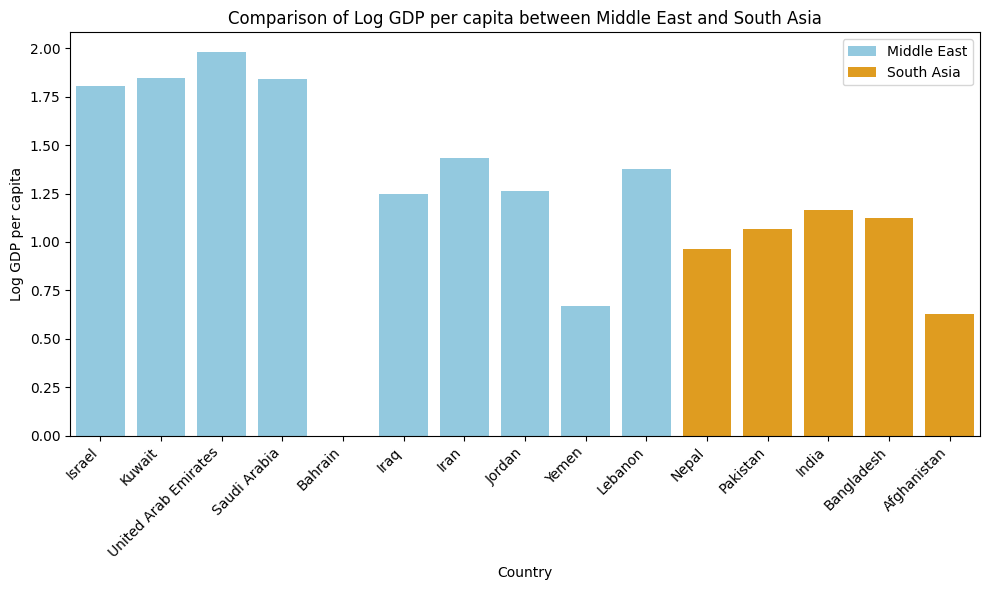

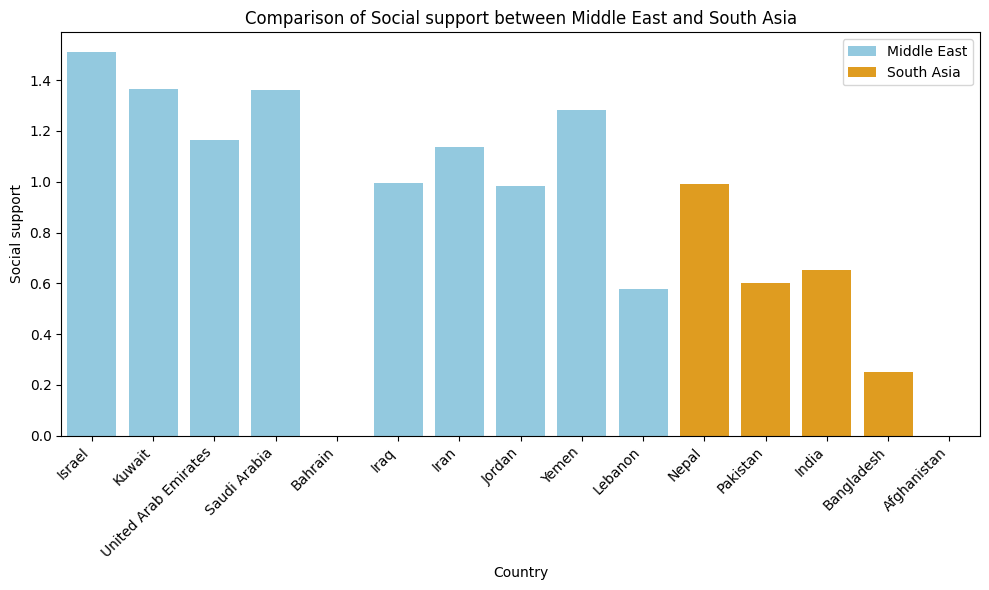

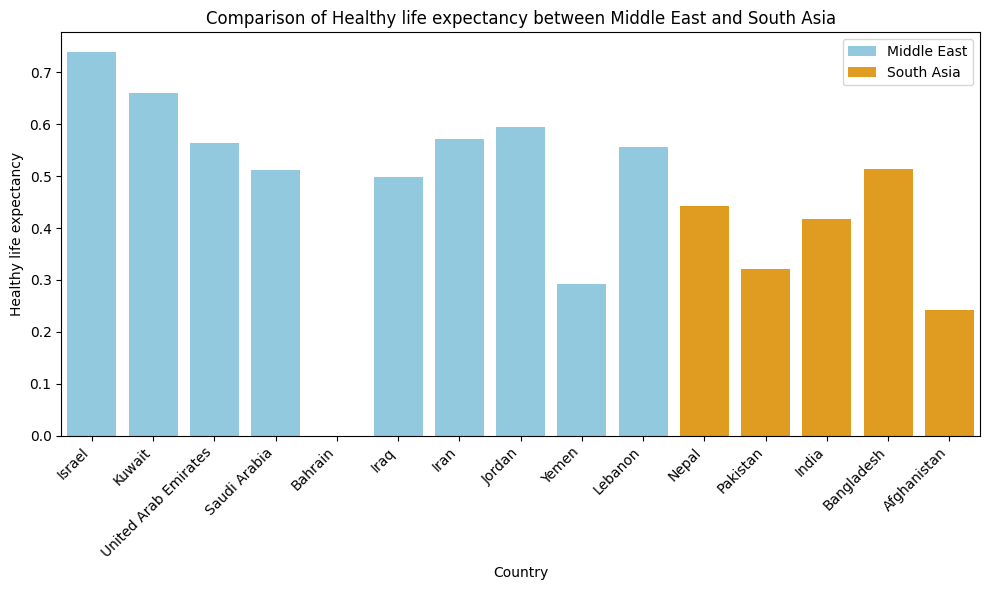

The metric with the largest disparity is: Social support


In [ ]:
#3. Metric Comparisons:
# Define the metrics for comparison
metrics = ['Log GDP per capita', 'Social support', 'Healthy life expectancy']

absolute_differences = []

for metric in metrics:
    # Calculate mean for each region
    middle_east_mean = middle_east_data[metric].mean()
    south_asia_mean = south_asia_data[metric].mean()

    # Calculate absolute difference and append to the list
    absolute_differences.append(abs(middle_east_mean - south_asia_mean))

# Create grouped bar charts for each metric
for metric in metrics:
    plt.figure(figsize=(10, 6))

    # Create the grouped barplot
    sns.barplot(x='Country name', y=metric, data=middle_east_data, color='skyblue', label='Middle East')
    sns.barplot(x='Country name', y=metric, data=south_asia_data, color='orange', label='South Asia')

    plt.xticks(rotation=45, ha='right')
    plt.title(f'Comparison of {metric} between Middle East and South Asia')
    plt.xlabel('Country')
    plt.ylabel(metric)
    plt.legend()
    plt.tight_layout()
    plt.show()

largest_disparity_metric = metrics[np.argmax(absolute_differences)]
print(f"The metric with the largest disparity is: {largest_disparity_metric}")

In [ ]:
#4 Calculate range and coefficient of variation for Score
range_me = middle_east_data['score'].max() - middle_east_data['score'].min()
cv_me =  middle_east_data['score'].std() / middle_east_data['score'].mean()

range_sa = south_asia_data['score'].max() - south_asia_data['score'].min()
cv_sa = south_asia_data['score'].std() / south_asia_data['score'].mean()

print(f"Middle East - Range: {range_me:.2f}, Coefficient of Variation: {cv_me:.2f}")
print(f"South Asia - Range: {range_sa:.2f}, Coefficient of Variation: {cv_sa:.2f}")

# Determine region with greater variability
if cv_me > cv_sa:
    greater_variability = "Middle East"
else:
    greater_variability = "South Asia"

print(f"The region with greater variability in happiness is: {greater_variability}")

Middle East - Range: 4.63, Coefficient of Variation: 0.29
South Asia - Range: 3.44, Coefficient of Variation: 0.34
The region with greater variability in happiness is: South Asia



Correlation Analysis for South Asia:
  Correlation between Score and Freedom to make life choices: 0.80


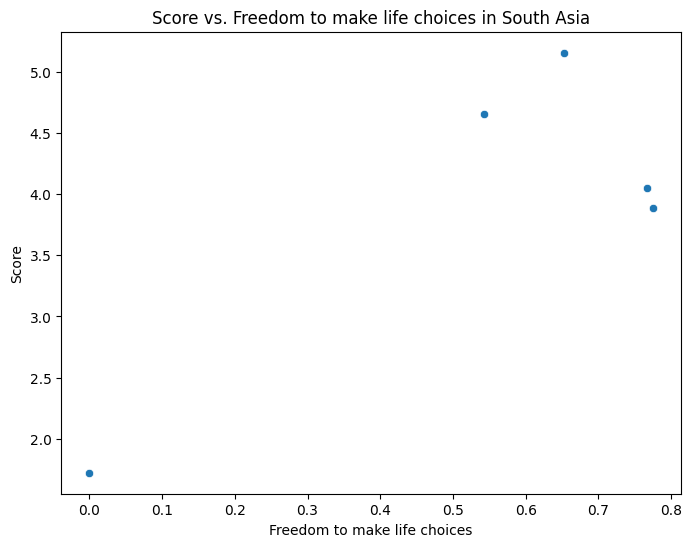

  Correlation between Score and Generosity: 0.88


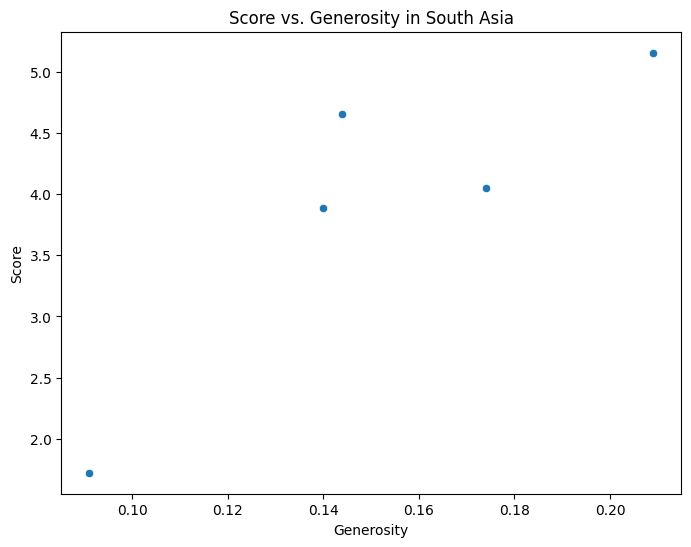


Correlation Analysis for Middle East:
  Correlation between Score and Freedom to make life choices: 0.86


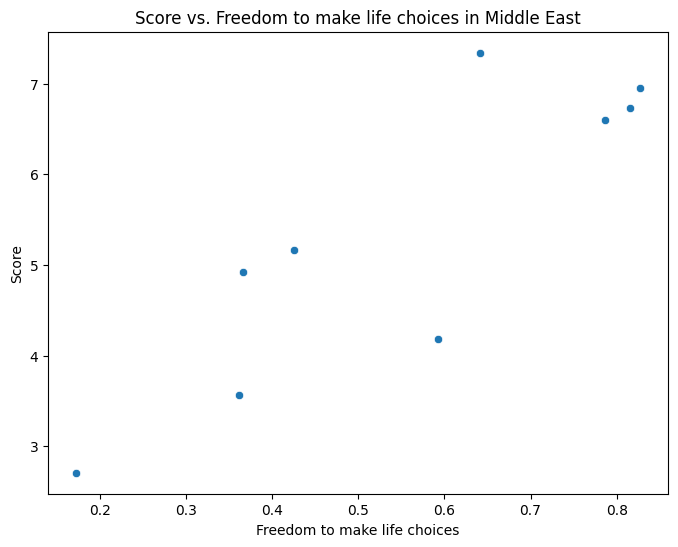

  Correlation between Score and Generosity: 0.63


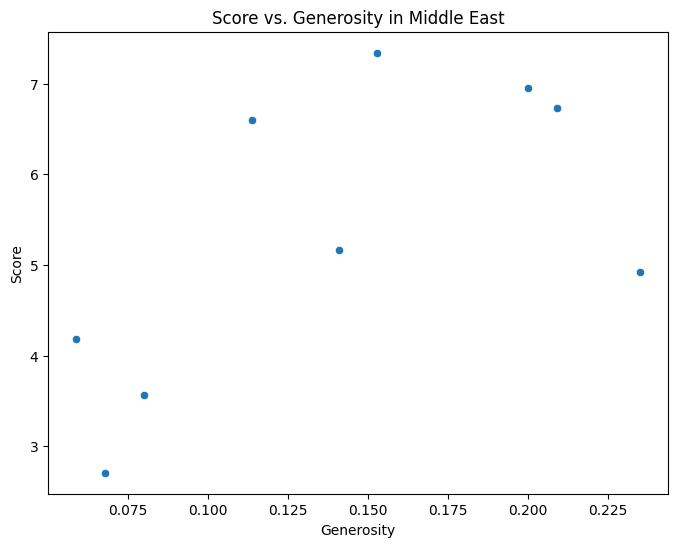

In [ ]:
# 5. Correlation Analysis:

# Define the metrics for correlation analysis
metrics = ['Freedom to make life choices', 'Generosity']

# Function to analyze and plot correlations for a region
def analyze_correlations(df, region_name):
    print(f"\nCorrelation Analysis for {region_name}:")
    for metric in metrics:
        correlation = df['score'].corr(df[metric])
        print(f"  Correlation between Score and {metric}: {correlation:.2f}")

        # Create scatter plot
        plt.figure(figsize=(8, 6))
        sns.scatterplot(x=metric, y='score', data=df)
        plt.title(f'Score vs. {metric} in {region_name}')
        plt.xlabel(metric)
        plt.ylabel('Score')
        plt.show()

# Analyze correlations for South Asia and Middle East
analyze_correlations(south_asia_data, "South Asia")
analyze_correlations(middle_east_data, "Middle East")

In [ ]:

#6 Function to detect outliers using 1.5×IQR rule
def detect_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Detect outliers for Middle East
outliers_me_score = detect_outliers(middle_east_data, 'score')
outliers_me_gdp = detect_outliers(middle_east_data, 'Log GDP per capita')

# Detect outliers for South Asia
outliers_sa_score = detect_outliers(south_asia_data, 'score')
outliers_sa_gdp = detect_outliers(south_asia_data, 'Log GDP per capita')

print("Outliers in Middle East (Score):")
print(outliers_me_score[['Country name', 'score']])

print("\nOutliers in South Asia (Score):")
print(outliers_sa_score[['Country name', 'score']])

print("\nOutliers in Middle East (GDP per Capita):")
print(outliers_me_gdp[['Country name', 'score']])

print("\nOutliers in South Asia (GDP per Capita):")
print(outliers_sa_gdp[['Country name', 'score']])

Outliers in Middle East (Score):
Empty DataFrame
Columns: [Country name, score]
Index: []

Outliers in South Asia (Score):
    Country name  score
142  Afghanistan  1.721

Outliers in Middle East (GDP per Capita):
Empty DataFrame
Columns: [Country name, score]
Index: []

Outliers in South Asia (GDP per Capita):
    Country name  score
142  Afghanistan  1.721


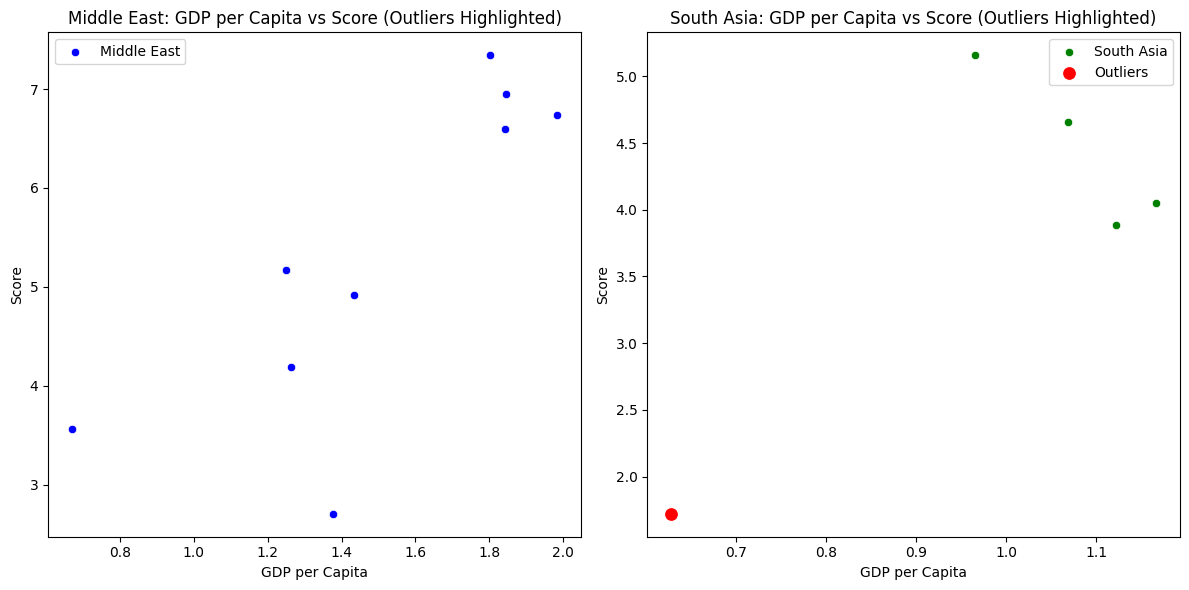

In [ ]:
# Scatter plot for Middle East
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x='Log GDP per capita', y='score', data=middle_east_data, color='blue', label='Middle East')
sns.scatterplot(x='Log GDP per capita', y='score', data=outliers_me_gdp, color='red', s=100, label='Outliers')
plt.title("Middle East: GDP per Capita vs Score (Outliers Highlighted)")
plt.xlabel("GDP per Capita")
plt.ylabel("Score")

# Scatter plot for South Asia
plt.subplot(1, 2, 2)
sns.scatterplot(x='Log GDP per capita', y='score', data=south_asia_data, color='green', label='South Asia')
sns.scatterplot(x='Log GDP per capita', y='score', data=outliers_sa_gdp, color='red', s=100, label='Outliers')
plt.title("South Asia: GDP per Capita vs Score (Outliers Highlighted)")
plt.xlabel("GDP per Capita")
plt.ylabel("Score")

plt.tight_layout()
plt.show()


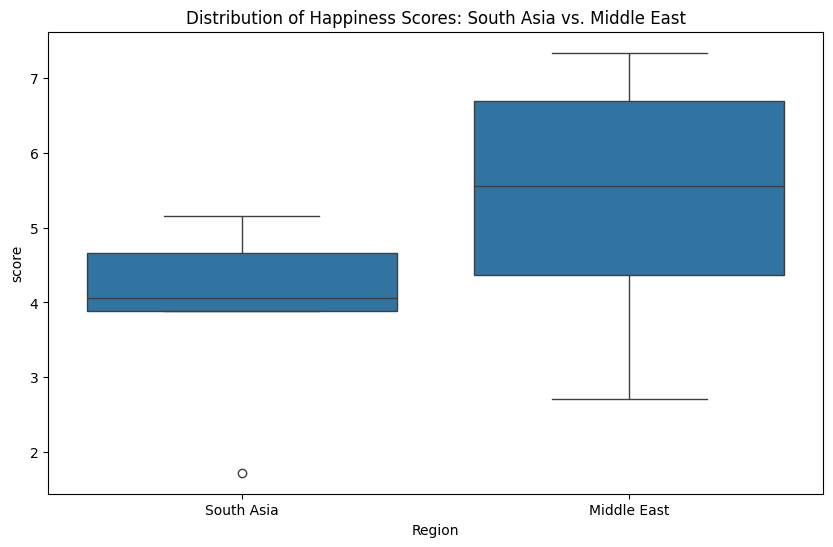

In [ ]:
#7 Boxplot for Score distributions
plt.figure(figsize=(10, 6))
sns.boxplot(x='Region', y='score', data=pd.concat([south_asia_data.assign(Region='South Asia'),
                                                  middle_east_data.assign(Region='Middle East')]))
plt.title('Distribution of Happiness Scores: South Asia vs. Middle East')
plt.show()
